In [1]:
freq = 15

In [2]:
import codigo
from codigo import utils
from codigo import model_LSTM
from codigo import model_utils
from cg_ega.cg_ega import CG_EGA

In [3]:
import pandas as pd
import numpy as np
pd.set_option('mode.chained_assignment',None)
import matplotlib.pyplot as plt
import seaborn as sns
import math

%matplotlib inline

In [4]:
import tensorflow as tf
from tensorflow import keras

In [5]:
with open('dataset/generado/dataset15min/array_Xtest.npy', 'rb') as f:
    array_Xtest = np.load(f)

In [6]:
len(array_Xtest)

436590

In [7]:
with open('dataset/generado/dataset15min/array_Ytest.npy', 'rb') as f:
    array_Ytest = np.load(f)

In [8]:
len(array_Ytest)

436590

In [9]:
model = keras.models.load_model('modelos/modeloGeneral/vanilla_NO_dropout.h5')

In [10]:
from pickle import load
scalerGlucosa = load(open('dataset/generado/scalerGlucosa.scaler', 'rb'))

# Predicción de todo el conjunto de pruebas generales

In [11]:
len(array_Ytest)

436590

13644/13644 [==============================] - 144s 10ms/step


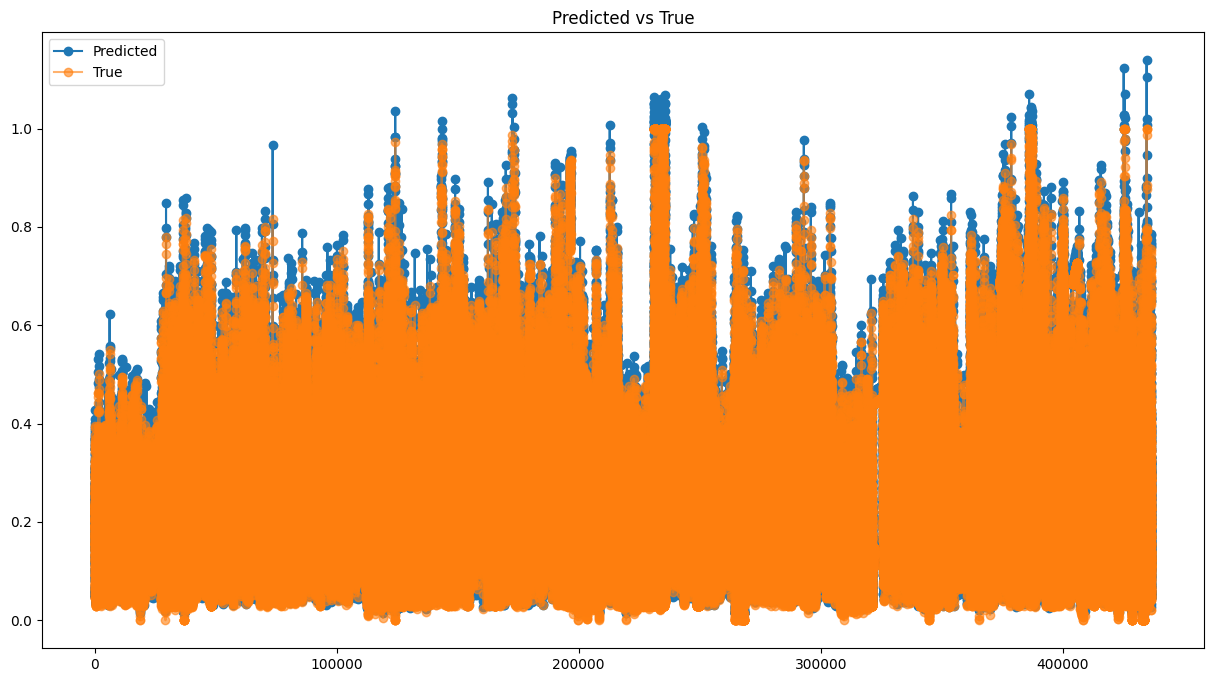

In [12]:
yhat = model.predict(array_Xtest)
model_utils.plotPredicted(yhat,array_Ytest)

In [13]:
model_utils.forecast_accuracy(yhat,array_Ytest)

{'mae': 0.029356438124404936,
 'mse': 0.04073604070726855,
 'rmse': 0.0016594250125042404}

In [14]:
yhat_scaled=scalerGlucosa.inverse_transform(yhat)
yhat_df = pd.DataFrame(yhat_scaled, columns=['Glucose level'])
yhat_df

Glucose level
0          151.038391
1          147.870239
2          144.914734
3          144.992798
4          146.401505
...               ...
436585      83.698502
436586     131.796951
436587     174.972641
436588     216.009628
436589     213.314941

[436590 rows x 1 columns]

In [15]:
array_Ytest_scaled=scalerGlucosa.inverse_transform(array_Ytest)
array_Ytest_df = pd.DataFrame(array_Ytest_scaled, columns=['Glucose level'])
array_Ytest_df

Glucose level
0               141.0
1               140.0
2               139.0
3               145.0
4               159.0
...               ...
436585          137.0
436586          177.0
436587          198.0
436588          216.0
436589          233.0

[436590 rows x 1 columns]

In [16]:
dfPlot=pd.DataFrame()
dfPlot['y_true']=array_Ytest_df['Glucose level']
dfPlot['y_pred']=yhat_df['Glucose level']
dfPlot.index=pd.date_range("2023-01-01", periods=len(array_Ytest), freq="15min")
dfPlot

y_true      y_pred
2023-01-01 00:00:00   141.0  151.038391
2023-01-01 00:15:00   140.0  147.870239
2023-01-01 00:30:00   139.0  144.914734
2023-01-01 00:45:00   145.0  144.992798
2023-01-01 01:00:00   159.0  146.401505
...                     ...         ...
2035-06-14 18:15:00   137.0   83.698502
2035-06-14 18:30:00   177.0  131.796951
2035-06-14 18:45:00   198.0  174.972641
2035-06-14 19:00:00   216.0  216.009628
2035-06-14 19:15:00   233.0  213.314941

[436590 rows x 2 columns]

AP, BE, EP: (0.9041615798840558, 0.07554473429243522, 0.020293685823509065)


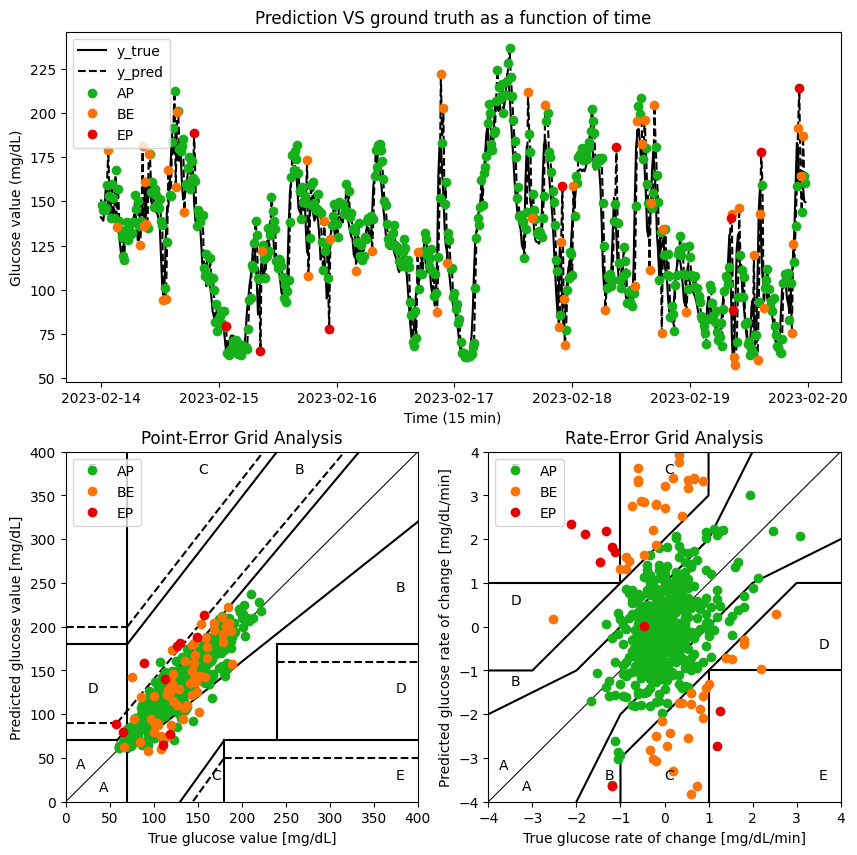

In [17]:
cg_ega = CG_EGA(dfPlot, 15)
print("AP, BE, EP:", cg_ega.reduced())
cg_ega.plot(day=5)

In [18]:
cg_ega.per_sample()

datetime  y_true      y_pred   dy_true   dy_pred CG_EGA  \
0      2023-02-14 00:00:00   141.0  151.038391       NaN       NaN    NaN   
1      2023-02-14 00:15:00   140.0  147.870239 -0.066667 -0.211210     AP   
2      2023-02-14 00:30:00   139.0  144.914734 -0.066667 -0.197034     AP   
3      2023-02-14 00:45:00   145.0  144.992798  0.400000  0.005204     AP   
4      2023-02-14 01:00:00   159.0  146.401505  0.933333  0.093914     AP   
...                    ...     ...         ...       ...       ...    ...   
436585 2035-07-28 18:15:00   137.0   83.698502  2.333333 -0.124880     BE   
436586 2035-07-28 18:30:00   177.0  131.796951  2.666667  3.206563     AP   
436587 2035-07-28 18:45:00   198.0  174.972641  1.400000  2.878379     AP   
436588 2035-07-28 19:00:00   216.0  216.009628  1.200000  2.735799     AP   
436589 2035-07-28 19:15:00   233.0  213.314941  1.133333 -0.179646     AP   

       P_EGA R_EGA  
0        NaN   NaN  
1          A     A  
2          A     A  
3          A     A  
4          A     A  
...      ...   ...  
436585     B    lD  
436586     A     A  
436587     A     B  
436588     A     B  
436589     A     B  

[436590 rows x 8 columns]

# Predicción a 30 min del conjunto de pruebas generales

In [19]:
lenHorizonte=2
XTest=[]
YTest=[]
for i in range(lenHorizonte):
    XTest.append(array_Xtest[i]) 
    YTest.append(array_Ytest[i]) 
XTest=np.reshape(XTest, (lenHorizonte, array_Xtest.shape[1],array_Xtest.shape[2]))

df_YTest = pd.DataFrame(YTest, columns=['Glucose level True'])

YTest_scaled=scalerGlucosa.inverse_transform(YTest)
df_YTest_scaled = pd.DataFrame(YTest_scaled, columns=['Glucose level True']) 

In [20]:
yhat = model.predict(XTest)
df_glucose = pd.DataFrame(yhat, columns=['Glucose level Predict'])
df_glucose['Glucose level True']=df_YTest['Glucose level True']
df_glucose.head()

1/1 [==============================] - 0s 39ms/step


Glucose level Predict  Glucose level True
0               0.241388            0.219565
1               0.234501            0.217391

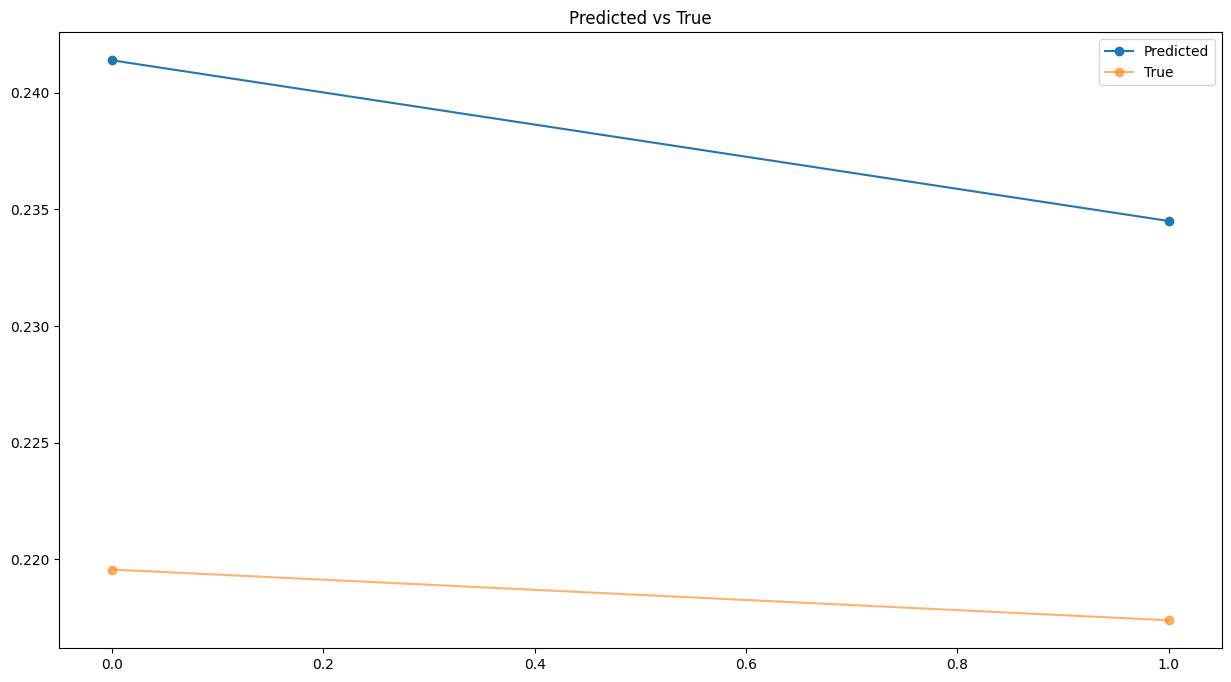

{'mae': 0.01946588016074635,
 'mse': 0.019608016810612153,
 'rmse': 0.0003844743232452488}

In [21]:
model_utils.plotPredicted(yhat,YTest)
model_utils.forecast_accuracy(yhat,YTest)

In [22]:
yhat_scaled=scalerGlucosa.inverse_transform(yhat)
df_glucose = pd.DataFrame(yhat_scaled, columns=['Glucose level Predict'])
df_glucose['Glucose level True']=df_YTest_scaled['Glucose level True']
df_glucose.head()

Glucose level Predict  Glucose level True
0             151.038376               141.0
1             147.870239               140.0

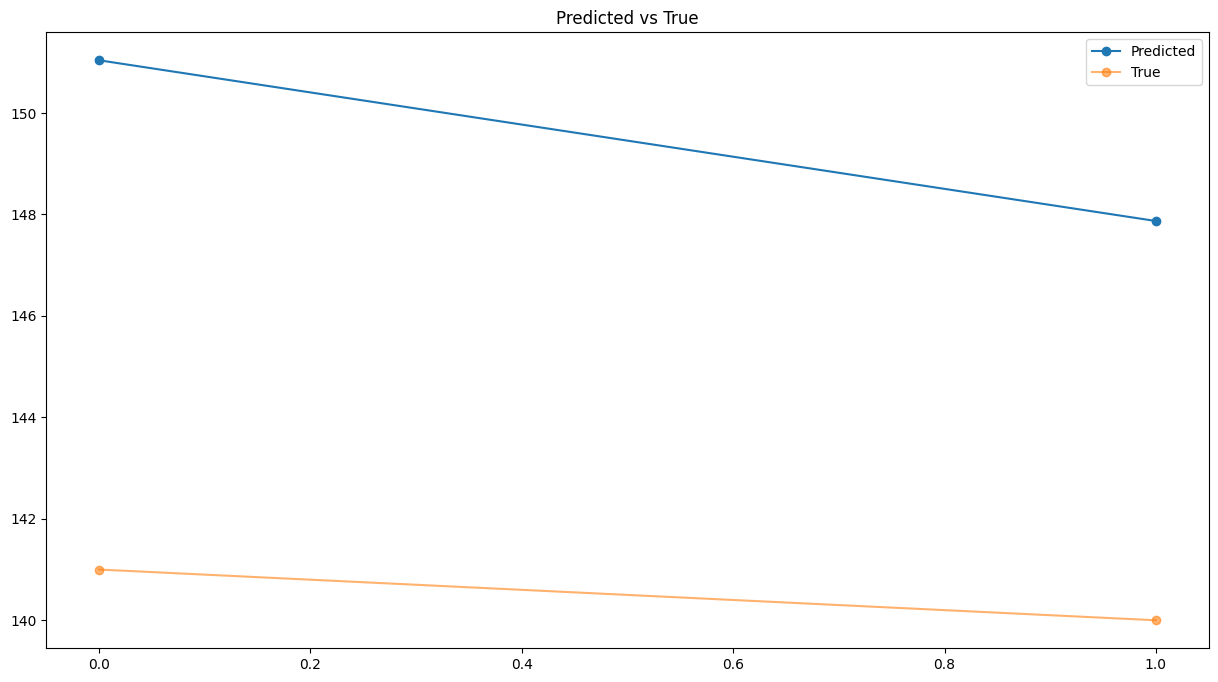

{'mae': 8.954307556152344, 'mse': 9.019691119192077, 'rmse': 81.3548278856324}

In [23]:
model_utils.plotPredicted(yhat_scaled,YTest_scaled)
model_utils.forecast_accuracy(yhat_scaled,YTest_scaled)

# Predicción sobre predicción a 30 min del conjunto de pruebas generales

In [24]:
yhat=model_utils.predictionOverPrediction(XTest,model)
df_yhat = pd.DataFrame(yhat, columns=['Glucose level Predict'])
df_yhat.head()

df_glucose = pd.DataFrame(yhat, columns=['Glucose level Predict'])
df_glucose['Glucose level True']=df_YTest['Glucose level True']
df_glucose.head()

1/1 [==============================] - 0s 23ms/step


Glucose level Predict  Glucose level True
0               0.241388            0.219565
1               0.278413            0.217391

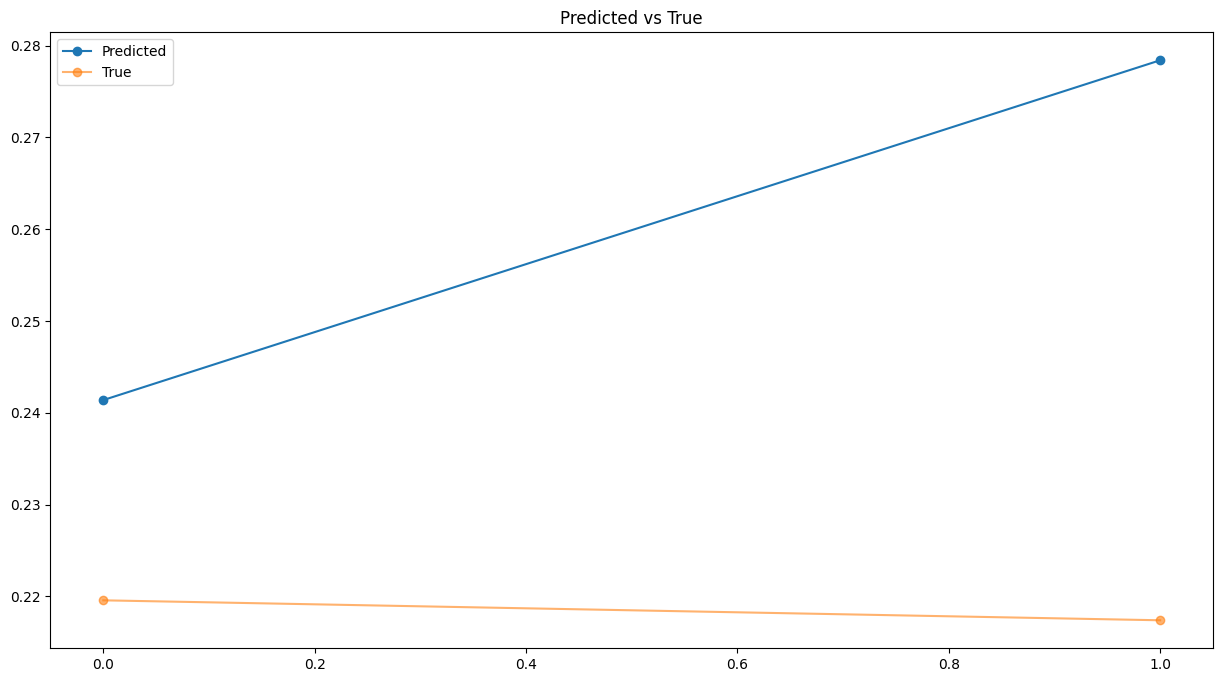

{'mae': 0.04142223454040028,
 'mse': 0.045825182053821766,
 'rmse': 0.0020999473102659085}

In [25]:
model_utils.plotPredicted(yhat,YTest)
model_utils.forecast_accuracy(yhat,YTest)

In [26]:
yhat_scaled=scalerGlucosa.inverse_transform(df_yhat) 

df_glucose = pd.DataFrame(yhat_scaled, columns=['Glucose level Predict'])
df_glucose['Glucose level True']=df_YTest_scaled['Glucose level True']
df_glucose.head()

Glucose level Predict  Glucose level True
0             151.038391               141.0
1             168.070068               140.0

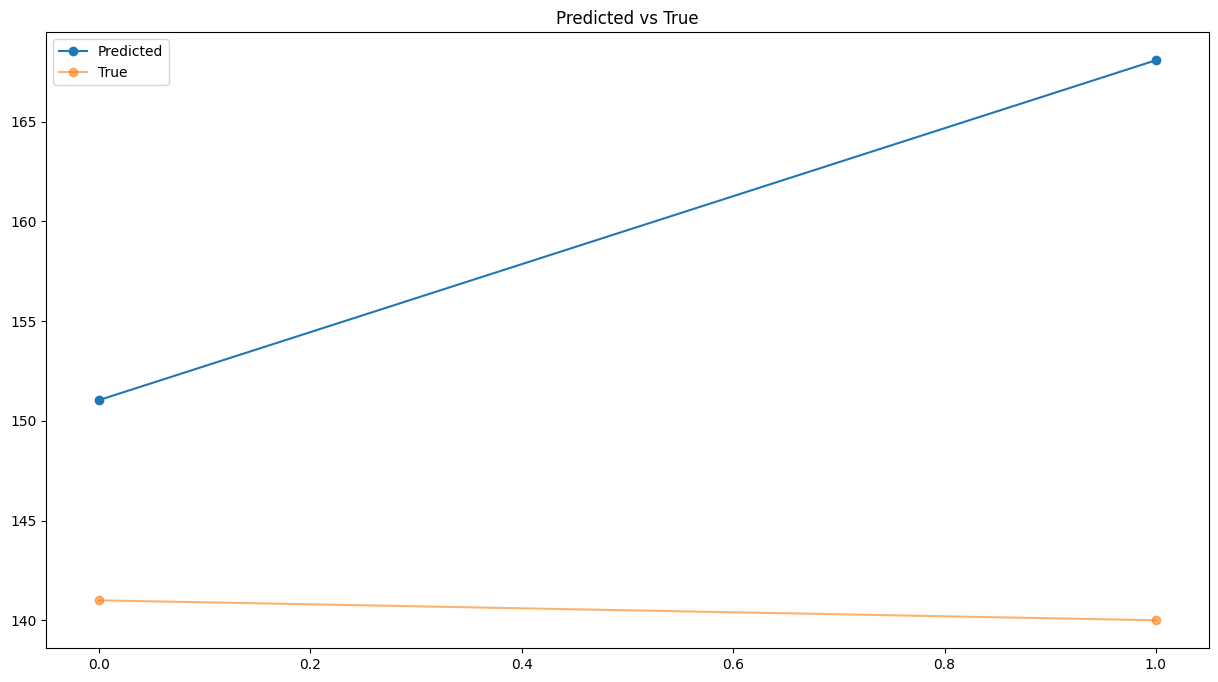

{'mae': 19.054229736328125,
 'mse': 21.079587683861245,
 'rmse': 444.34901692159474}

In [27]:
model_utils.plotPredicted(yhat_scaled,YTest_scaled)
model_utils.forecast_accuracy(yhat_scaled,YTest_scaled)

# Predicción del conjunto pruebas del paciente 1

In [28]:
with open('dataset/generado/paciente1/array_Xtest.npy', 'rb') as f:
    X = np.load(f) 

In [29]:
with open('dataset/generado/paciente1/array_Ytest.npy', 'rb') as f:
    Y = np.load(f) 

In [30]:
len(X)

191

In [31]:
len(Y)

191

In [32]:
df_Y = pd.DataFrame(Y, columns=['Glucose level True'])

In [33]:
yhat = model.predict(X)
df_glucose = pd.DataFrame(yhat, columns=['Glucose level Predict'])
df_glucose['Glucose level True']=df_Y['Glucose level True']
df_glucose.head()

6/6 [==============================] - 0s 4ms/step


Glucose level Predict  Glucose level True
0               0.273877            0.182609
1               0.241535            0.154348
2               0.116278            0.152174
3               0.180925            0.150000
4               0.153005            0.123913

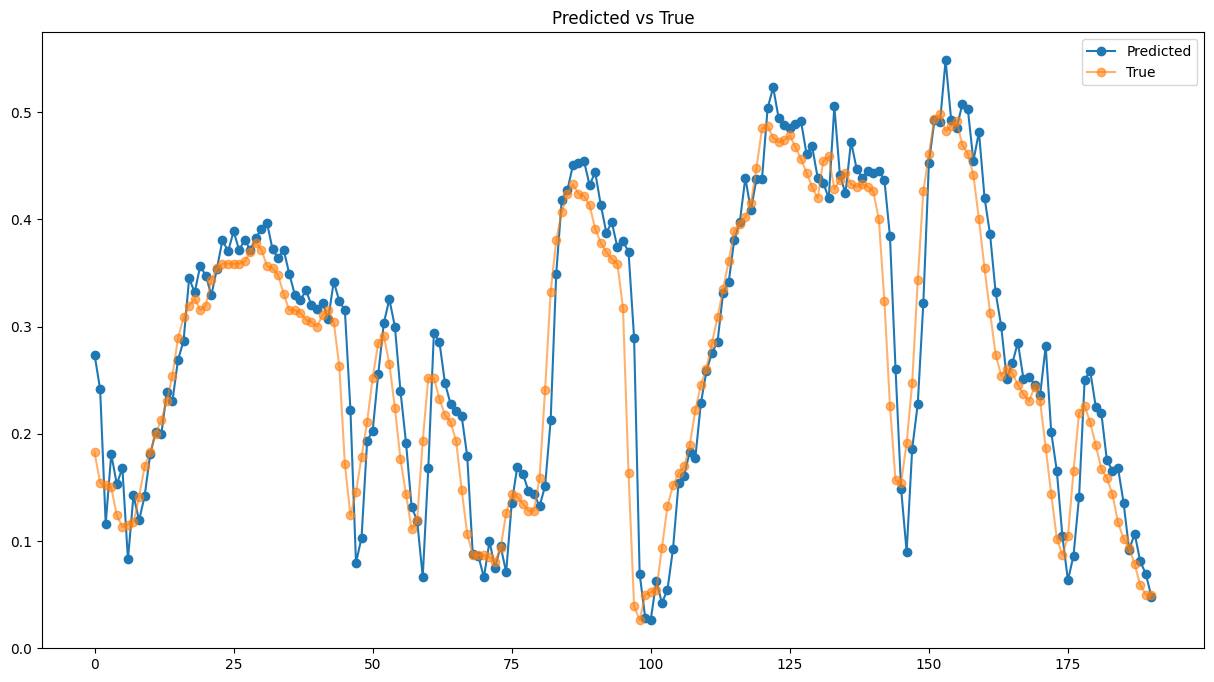

{'mae': 0.03613146698162139,
 'mse': 0.05103546002215538,
 'rmse': 0.00260461817967302}

In [34]:
model_utils.plotPredicted(yhat,Y)
model_utils.forecast_accuracy(yhat,Y)

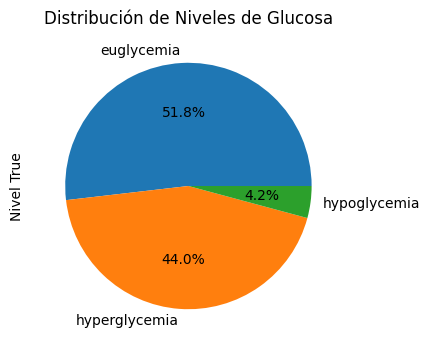

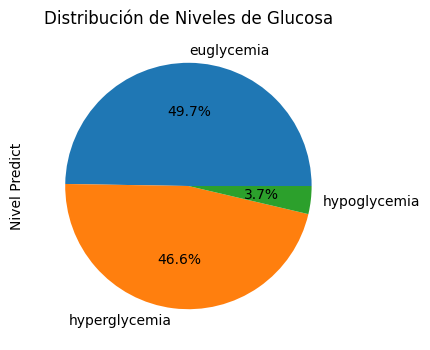

Glucose level True  Nivel True  Glucose level Predict Nivel Predict
0               124.0  euglycemia             165.983627    euglycemia
1               111.0  euglycemia             151.106308    euglycemia
2               110.0  euglycemia              93.488029    euglycemia
3               109.0  euglycemia             123.225304    euglycemia
4                97.0  euglycemia             110.382408    euglycemia

In [35]:
Y_scaled=scalerGlucosa.inverse_transform(Y)
yhat_scaled=scalerGlucosa.inverse_transform(yhat)

df_glucose = pd.DataFrame(Y_scaled, columns=['Glucose level True']) 
df_glucose['Nivel True'] = df_glucose['Glucose level True'].apply(utils.label_LevelBG) 
df_glucose['Nivel True'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

df_glucose['Glucose level Predict']=yhat_scaled
df_glucose['Nivel Predict'] = df_glucose['Glucose level Predict'].apply(utils.label_LevelBG) 

df_glucose['Nivel Predict'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

df_glucose.head()


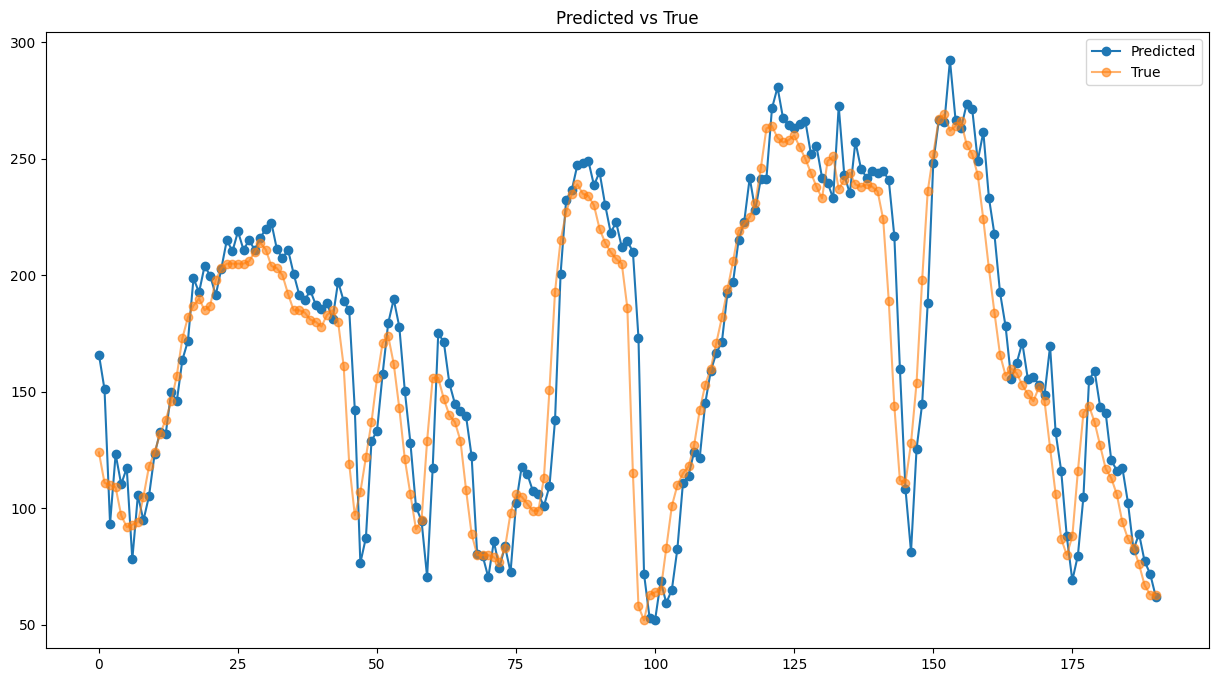

{'mae': 16.620476867516004,
 'mse': 23.47631316105738,
 'rmse': 551.1372796360359}

In [36]:
model_utils.plotPredicted(yhat_scaled,Y_scaled)
model_utils.forecast_accuracy(yhat_scaled,Y_scaled)

In [37]:
dfPlot=pd.DataFrame()
dfPlot['y_true']=df_glucose['Glucose level True']
dfPlot['y_pred']=df_glucose['Glucose level Predict']
dfPlot.index=pd.date_range("2023-01-01", periods=len(df_glucose['Glucose level True']), freq="15min")
dfPlot

y_true      y_pred
2023-01-01 00:00:00   124.0  165.983627
2023-01-01 00:15:00   111.0  151.106308
2023-01-01 00:30:00   110.0   93.488029
2023-01-01 00:45:00   109.0  123.225304
2023-01-01 01:00:00    97.0  110.382408
...                     ...         ...
2023-01-02 22:30:00    83.0   82.348747
2023-01-02 22:45:00    76.0   89.077995
2023-01-02 23:00:00    67.0   77.248810
2023-01-02 23:15:00    63.0   71.889397
2023-01-02 23:30:00    63.0   62.135460

[191 rows x 2 columns]

AP, BE, EP: (0.8947368421052632, 0.07894736842105263, 0.02631578947368421)


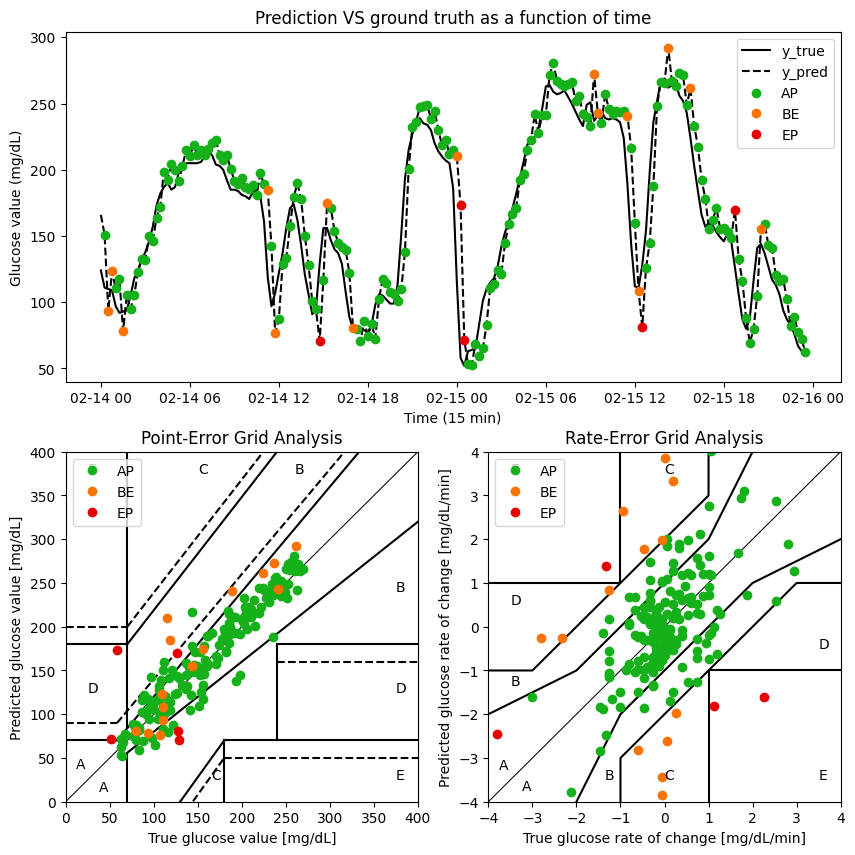

In [38]:
freq = 15
cg_ega = CG_EGA(dfPlot, freq)
print("AP, BE, EP:", cg_ega.reduced())
cg_ega.plot(day=5)

# Predicción del conjunto pruebas del paciente 2

In [39]:
with open('dataset/generado/paciente2/array_Xtest.npy', 'rb') as f:
    X = np.load(f) 

In [40]:
with open('dataset/generado/paciente2/array_Ytest.npy', 'rb') as f:
    Y = np.load(f) 

In [41]:
len(X)

1742

In [42]:
len(Y)

1742

In [43]:
df_Y = pd.DataFrame(Y, columns=['Glucose level True'])

In [44]:
yhat = model.predict(X)
df_glucose = pd.DataFrame(yhat, columns=['Glucose level Predict'])
df_glucose['Glucose level True']=df_Y['Glucose level True']
df_glucose.head()

55/55 [==============================] - 0s 5ms/step


Glucose level Predict  Glucose level True
0               0.344335            0.373913
1               0.389816            0.400000
2               0.408228            0.404348
3               0.437858            0.406522
4               0.410216            0.397826

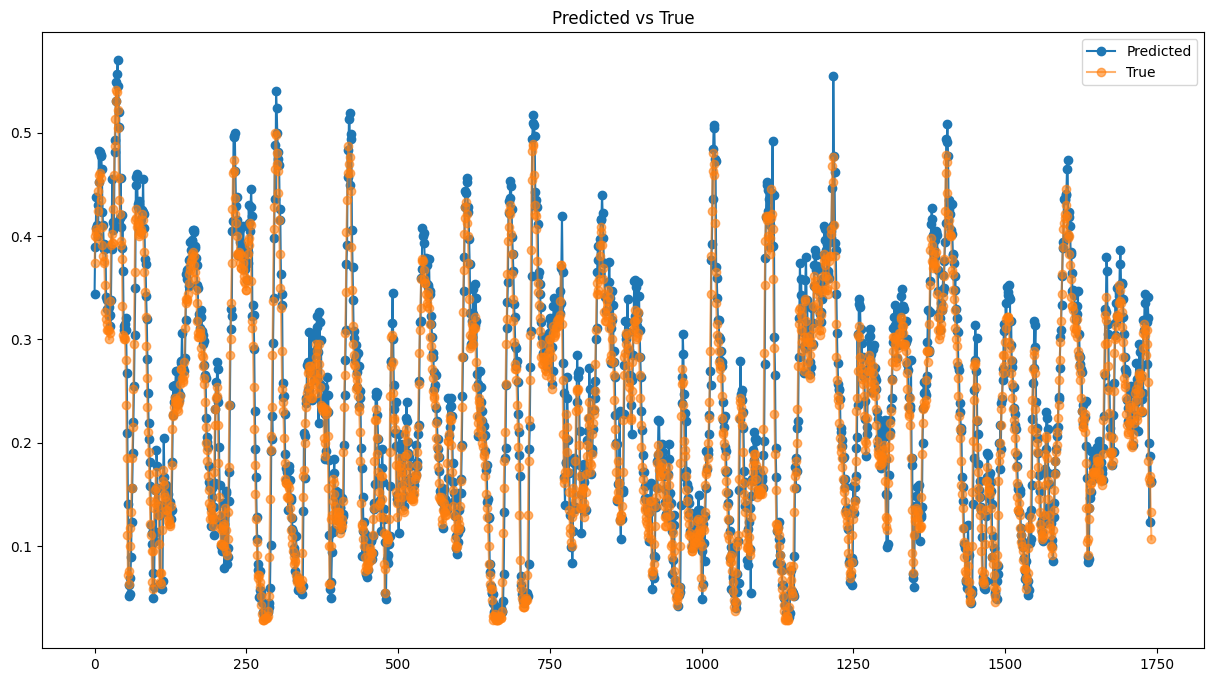

{'mae': 0.025541672262124226,
 'mse': 0.03247002868284824,
 'rmse': 0.0010543027626649876}

In [45]:
model_utils.plotPredicted(yhat,Y)
model_utils.forecast_accuracy(yhat,Y)

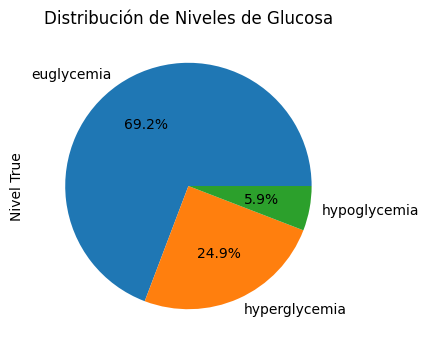

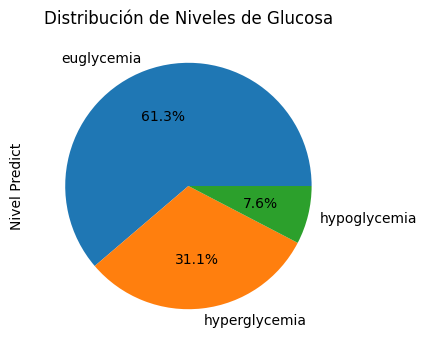

Glucose level True     Nivel True  Glucose level Predict  Nivel Predict
0               212.0  hyperglycemia             198.394119  hyperglycemia
1               224.0  hyperglycemia             219.315231  hyperglycemia
2               226.0  hyperglycemia             227.784882  hyperglycemia
3               227.0  hyperglycemia             241.414688  hyperglycemia
4               223.0  hyperglycemia             228.699387  hyperglycemia

In [46]:
Y_scaled=scalerGlucosa.inverse_transform(Y)
yhat_scaled=scalerGlucosa.inverse_transform(yhat)

df_glucose = pd.DataFrame(Y_scaled, columns=['Glucose level True']) 
df_glucose['Nivel True'] = df_glucose['Glucose level True'].apply(utils.label_LevelBG) 
df_glucose['Nivel True'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

df_glucose['Glucose level Predict']=yhat_scaled
df_glucose['Nivel Predict'] = df_glucose['Glucose level Predict'].apply(utils.label_LevelBG) 

df_glucose['Nivel Predict'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

df_glucose.head()


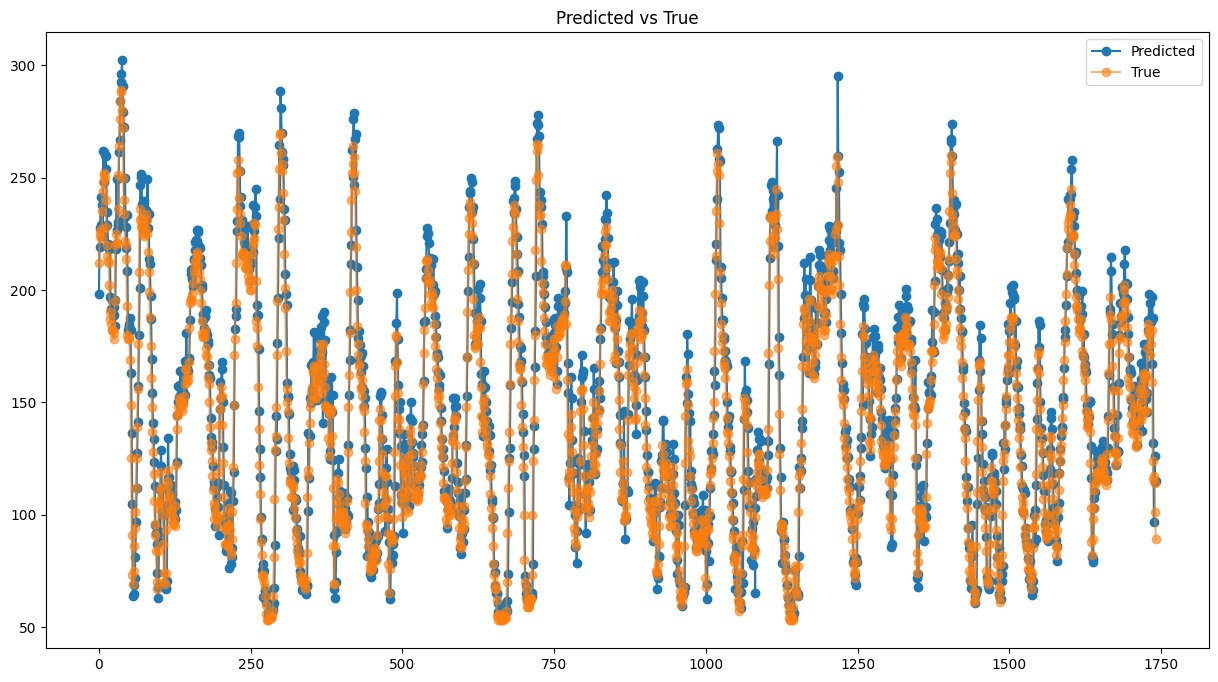

{'mae': 11.749170385682625,
 'mse': 14.936214292417295,
 'rmse': 223.0904973890107}

In [47]:
model_utils.plotPredicted(yhat_scaled,Y_scaled)
model_utils.forecast_accuracy(yhat_scaled,Y_scaled)

In [48]:
dfPlot=pd.DataFrame()
dfPlot['y_true']=df_glucose['Glucose level True']
dfPlot['y_pred']=df_glucose['Glucose level Predict']
dfPlot.index=pd.date_range("2023-01-01", periods=len(df_glucose['Glucose level True']), freq="15min")
dfPlot

y_true      y_pred
2023-01-01 00:00:00   212.0  198.394119
2023-01-01 00:15:00   224.0  219.315231
2023-01-01 00:30:00   226.0  227.784882
2023-01-01 00:45:00   227.0  241.414688
2023-01-01 01:00:00   223.0  228.699387
...                     ...         ...
2023-01-19 02:15:00   116.0  131.833359
2023-01-19 02:30:00   117.0   96.646889
2023-01-19 02:45:00   114.0  126.122787
2023-01-19 03:00:00   101.0  114.699860
2023-01-19 03:15:00    89.0  115.155365

[1742 rows x 2 columns]

AP, BE, EP: (0.9546237794371051, 0.037334865020103386, 0.0080413555427915)


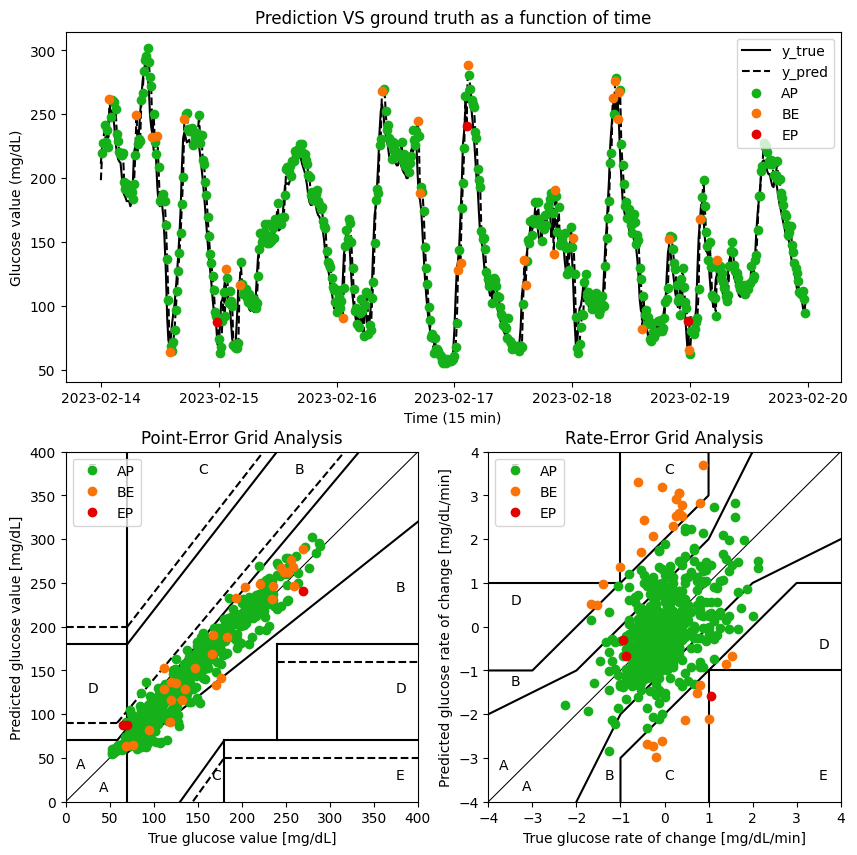

In [49]:
freq = 15
cg_ega = CG_EGA(dfPlot, freq)
print("AP, BE, EP:", cg_ega.reduced())
cg_ega.plot(day=5)

# Predicción del conjunto pruebas del paciente 3

In [50]:
with open('dataset/generado/paciente3/array_Xtest.npy', 'rb') as f:
    X = np.load(f) 

In [51]:
with open('dataset/generado/paciente3/array_Ytest.npy', 'rb') as f:
    Y = np.load(f) 

In [52]:
len(X)

3586

In [53]:
len(Y)

3586

In [54]:
df_Y = pd.DataFrame(Y, columns=['Glucose level True'])

In [55]:
yhat = model.predict(X)
df_glucose = pd.DataFrame(yhat, columns=['Glucose level Predict'])
df_glucose['Glucose level True']=df_Y['Glucose level True']
df_glucose.head()

113/113 [==============================] - 1s 4ms/step


Glucose level Predict  Glucose level True
0               0.320911            0.261858
1               0.282822            0.229051
2               0.243722            0.196245
3               0.222132            0.163439
4               0.169722            0.130632

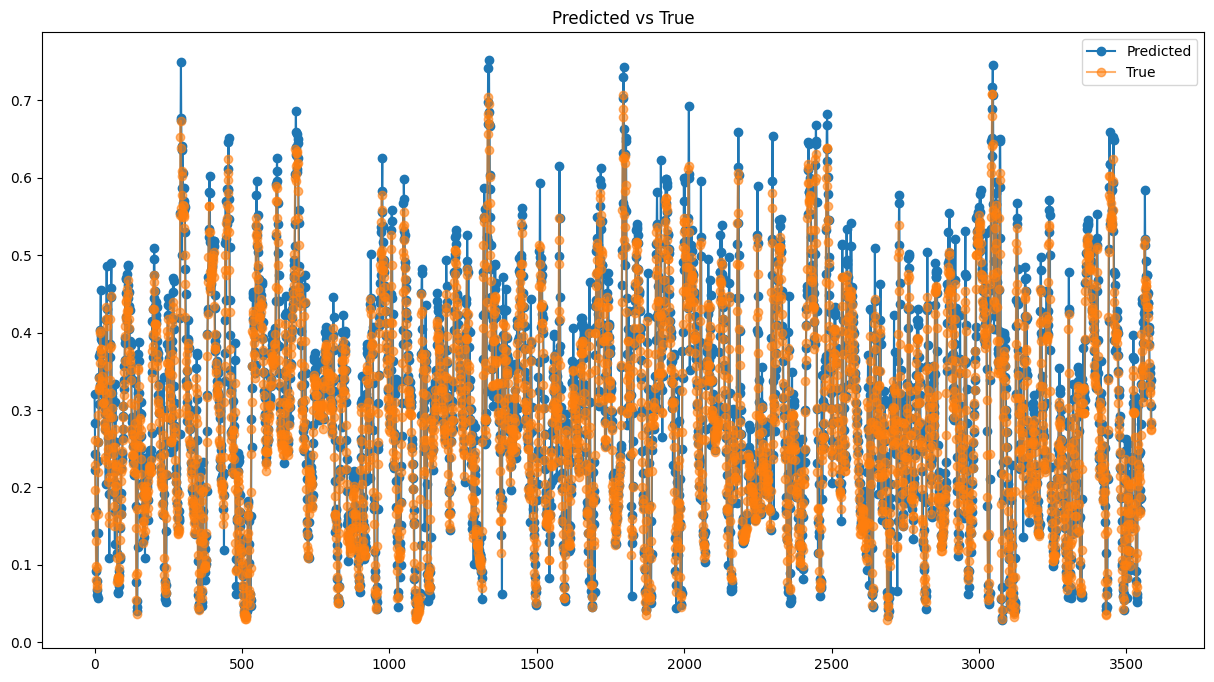

{'mae': 0.038090113652156005,
 'mse': 0.05130145268832975,
 'rmse': 0.0026318390479329362}

In [56]:
model_utils.plotPredicted(yhat,Y)
model_utils.forecast_accuracy(yhat,Y)

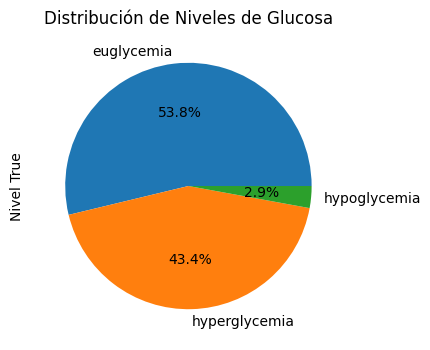

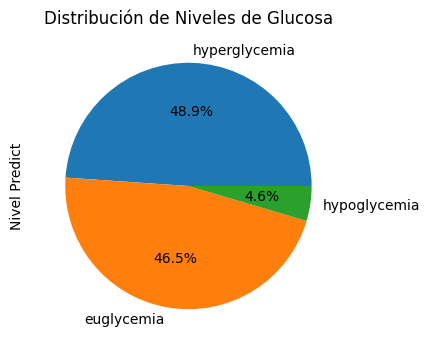

Glucose level True  Nivel True  Glucose level Predict  Nivel Predict
0          160.454545  euglycemia             187.619034  hyperglycemia
1          145.363636  euglycemia             170.098038     euglycemia
2          130.272727  euglycemia             152.112076     euglycemia
3          115.181818  euglycemia             142.180527     euglycemia
4          100.090909  euglycemia             118.072090     euglycemia

In [57]:
Y_scaled=scalerGlucosa.inverse_transform(Y)
yhat_scaled=scalerGlucosa.inverse_transform(yhat)

df_glucose = pd.DataFrame(Y_scaled, columns=['Glucose level True']) 
df_glucose['Nivel True'] = df_glucose['Glucose level True'].apply(utils.label_LevelBG) 
df_glucose['Nivel True'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

df_glucose['Glucose level Predict']=yhat_scaled
df_glucose['Nivel Predict'] = df_glucose['Glucose level Predict'].apply(utils.label_LevelBG) 

df_glucose['Nivel Predict'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

df_glucose.head()


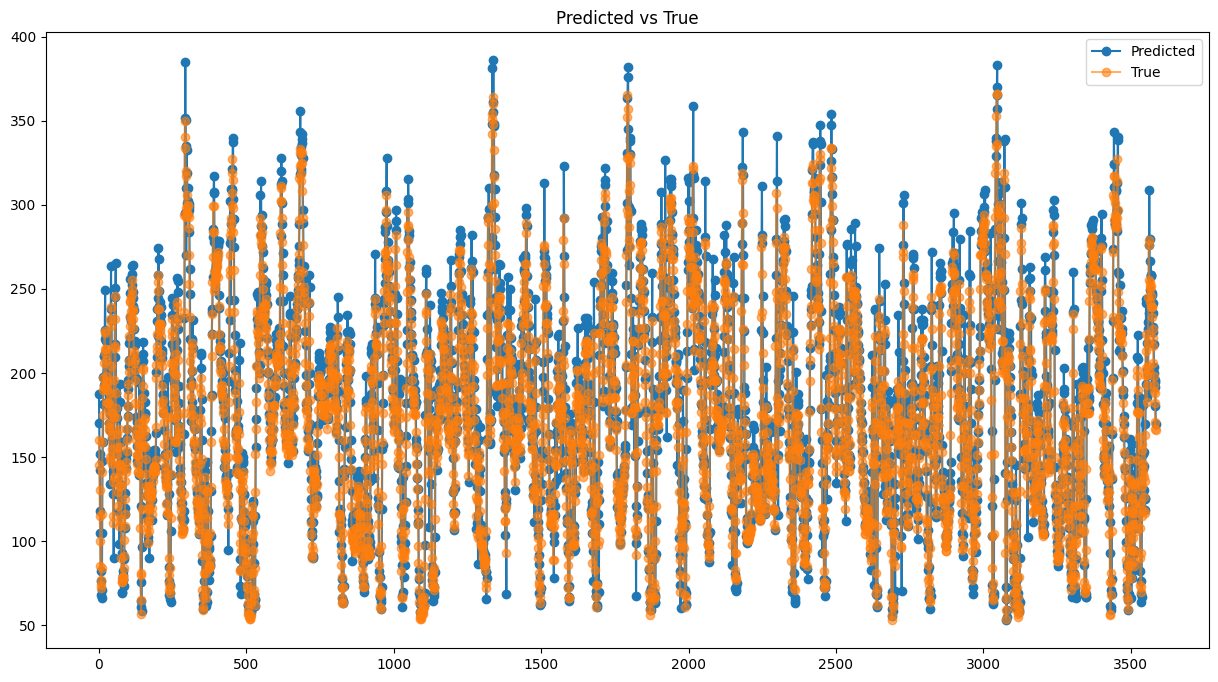

{'mae': 17.521452851720976,
 'mse': 23.59866826155739,
 'rmse': 556.8971437190361}

In [58]:
model_utils.plotPredicted(yhat_scaled,Y_scaled)
model_utils.forecast_accuracy(yhat_scaled,Y_scaled)

In [59]:
dfPlot=pd.DataFrame()
dfPlot['y_true']=df_glucose['Glucose level True']
dfPlot['y_pred']=df_glucose['Glucose level Predict']
dfPlot.index=pd.date_range("2023-01-01", periods=len(df_glucose['Glucose level True']), freq="15min")
dfPlot

y_true      y_pred
2023-01-01 00:00:00  160.454545  187.619034
2023-01-01 00:15:00  145.363636  170.098038
2023-01-01 00:30:00  130.272727  152.112076
2023-01-01 00:45:00  115.181818  142.180527
2023-01-01 01:00:00  100.090909  118.072090
...                         ...         ...
2023-02-07 07:15:00  188.000000  194.748810
2023-02-07 07:30:00  182.000000  191.584885
2023-02-07 07:45:00  171.000000  195.890930
2023-02-07 08:00:00  167.000000  180.352905
2023-02-07 08:15:00  166.000000  169.573090

[3586 rows x 2 columns]

AP, BE, EP: (0.8622036262203626, 0.10209205020920502, 0.03570432357043236)


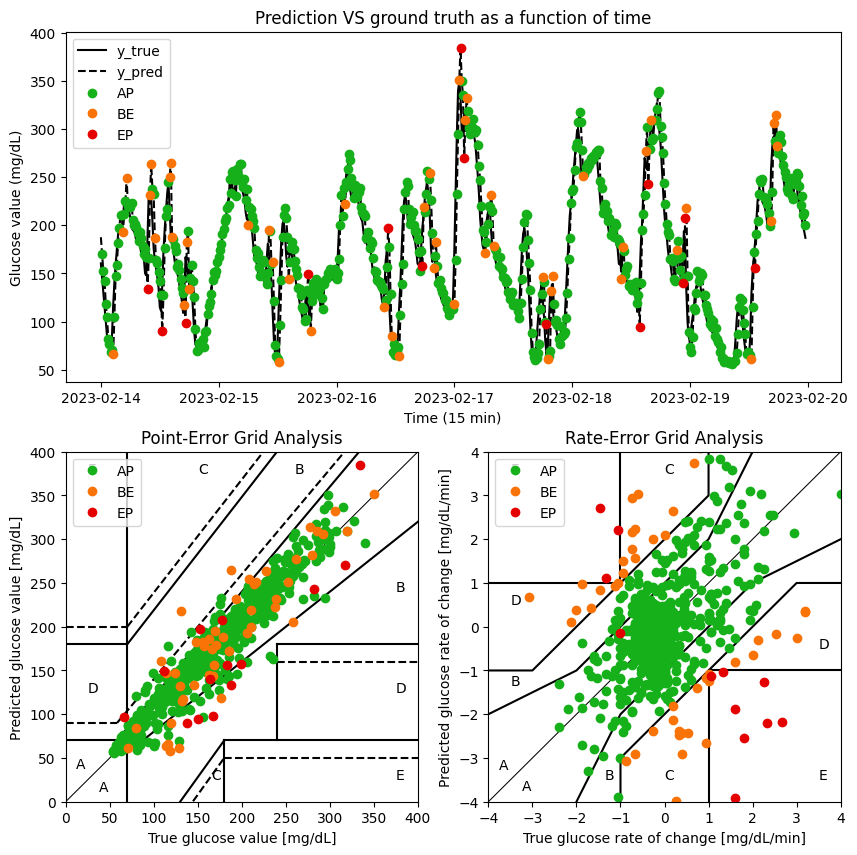

In [60]:
freq = 15
cg_ega = CG_EGA(dfPlot, freq)
print("AP, BE, EP:", cg_ega.reduced())
cg_ega.plot(day=5)

# Predicción del conjunto pruebas del paciente 4

In [61]:
with open('dataset/generado/paciente4/array_Xtest.npy', 'rb') as f:
    X = np.load(f) 

In [62]:
with open('dataset/generado/paciente4/array_Ytest.npy', 'rb') as f:
    Y = np.load(f) 

In [63]:
len(X)

6201

In [64]:
len(Y)

6201

In [65]:
df_Y = pd.DataFrame(Y, columns=['Glucose level True'])

In [66]:
yhat = model.predict(X)
df_glucose = pd.DataFrame(yhat, columns=['Glucose level Predict'])
df_glucose['Glucose level True']=df_Y['Glucose level True']
df_glucose.head()

194/194 [==============================] - 1s 4ms/step


Glucose level Predict  Glucose level True
0               0.553109            0.534783
1               0.562576            0.500000
2               0.542229            0.484783
3               0.475512            0.463043
4               0.504134            0.428261

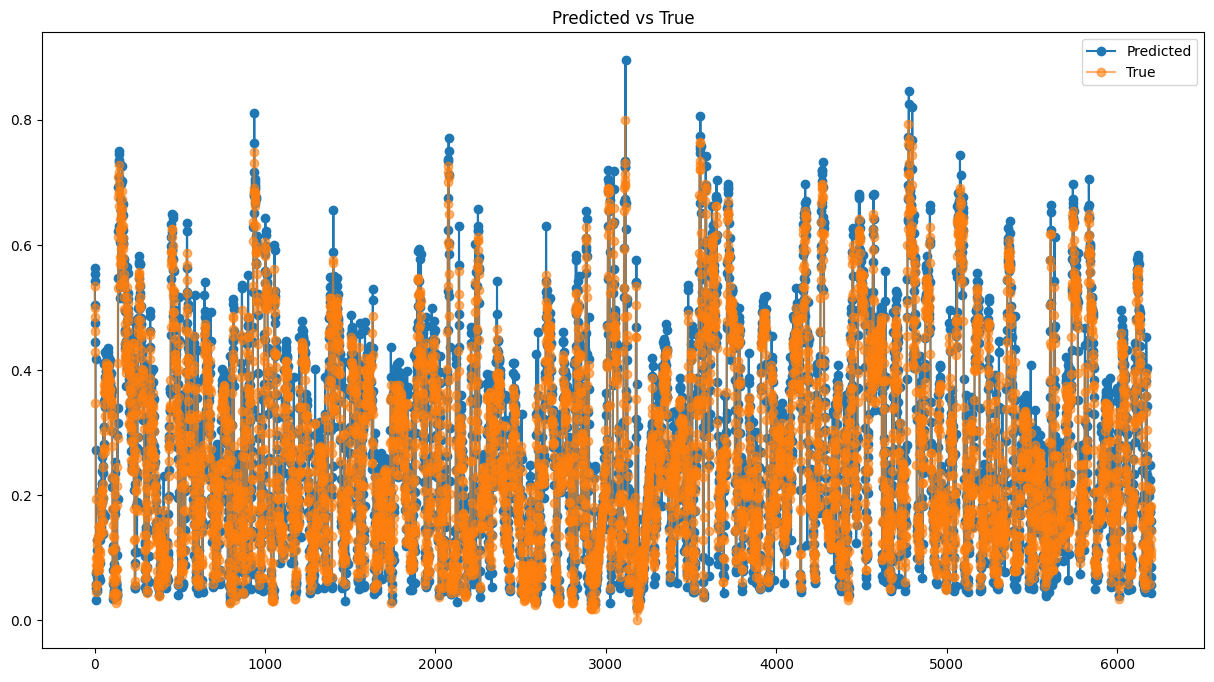

{'mae': 0.040611003775474955,
 'mse': 0.05661424881853214,
 'rmse': 0.0032051731692866675}

In [67]:
model_utils.plotPredicted(yhat,Y)
model_utils.forecast_accuracy(yhat,Y)

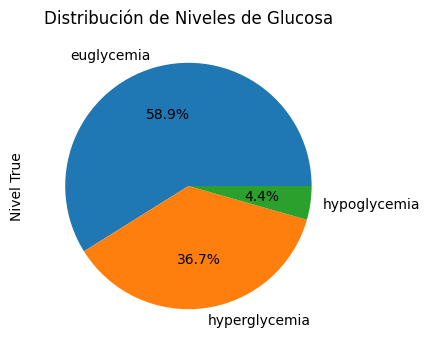

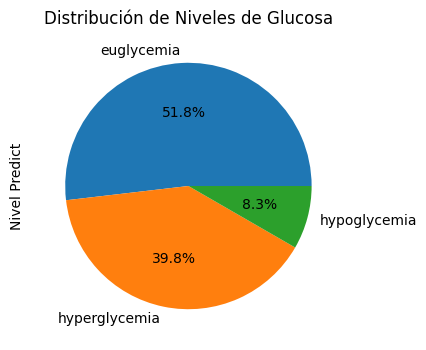

Glucose level True     Nivel True  Glucose level Predict  Nivel Predict
0               286.0  hyperglycemia             294.430145  hyperglycemia
1               270.0  hyperglycemia             298.784912  hyperglycemia
2               263.0  hyperglycemia             289.425232  hyperglycemia
3               253.0  hyperglycemia             258.735352  hyperglycemia
4               237.0  hyperglycemia             271.901459  hyperglycemia

In [68]:
Y_scaled=scalerGlucosa.inverse_transform(Y)
yhat_scaled=scalerGlucosa.inverse_transform(yhat)

df_glucose = pd.DataFrame(Y_scaled, columns=['Glucose level True']) 
df_glucose['Nivel True'] = df_glucose['Glucose level True'].apply(utils.label_LevelBG) 
df_glucose['Nivel True'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

df_glucose['Glucose level Predict']=yhat_scaled
df_glucose['Nivel Predict'] = df_glucose['Glucose level Predict'].apply(utils.label_LevelBG) 

df_glucose['Nivel Predict'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

df_glucose.head()


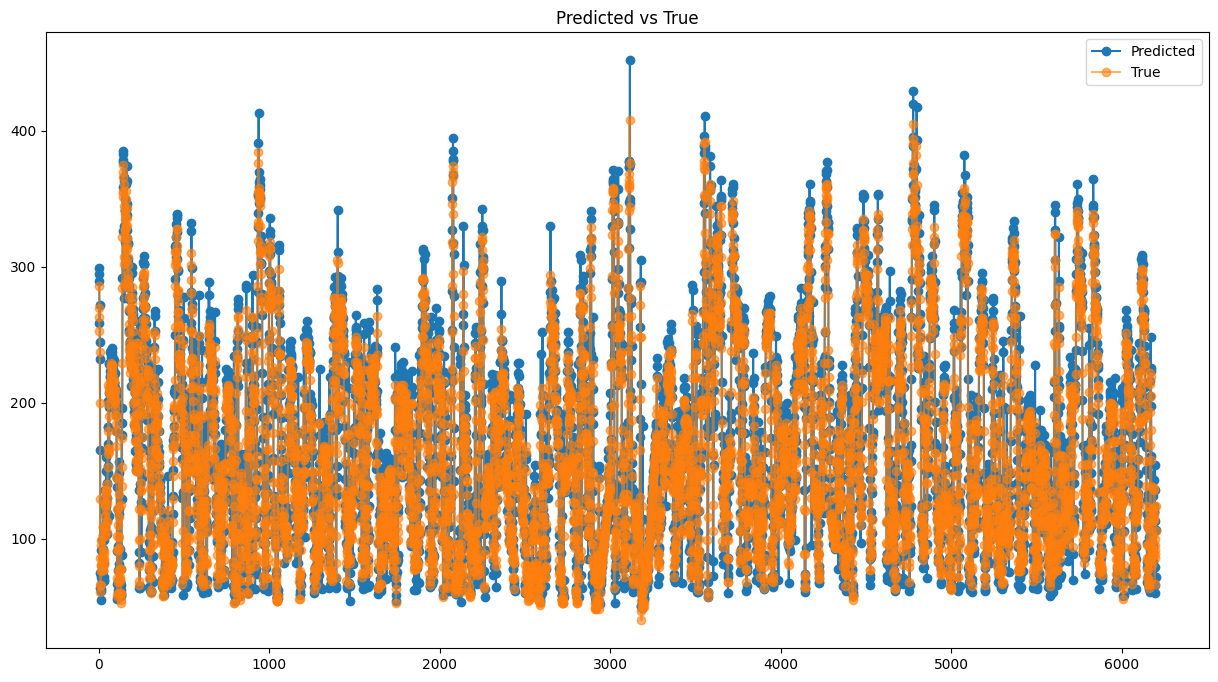

{'mae': 18.681061991262563, 'mse': 26.04255455303713, 'rmse': 678.214647647915}

In [69]:
model_utils.plotPredicted(yhat_scaled,Y_scaled)
model_utils.forecast_accuracy(yhat_scaled,Y_scaled)

In [70]:
dfPlot=pd.DataFrame()
dfPlot['y_true']=df_glucose['Glucose level True']
dfPlot['y_pred']=df_glucose['Glucose level Predict']
dfPlot.index=pd.date_range("2023-01-01", periods=len(df_glucose['Glucose level True']), freq="15min")
dfPlot

y_true      y_pred
2023-01-01 00:00:00   286.0  294.430145
2023-01-01 00:15:00   270.0  298.784912
2023-01-01 00:30:00   263.0  289.425232
2023-01-01 00:45:00   253.0  258.735352
2023-01-01 01:00:00   237.0  271.901459
...                     ...         ...
2023-03-06 13:00:00   100.0   59.818142
2023-03-06 13:15:00    89.0  112.929619
2023-03-06 13:30:00    92.0   79.098434
2023-03-06 13:45:00   106.0   72.057388
2023-03-06 14:00:00   124.0  106.627525

[6201 rows x 2 columns]

AP, BE, EP: (0.8170967741935484, 0.13451612903225807, 0.04838709677419355)


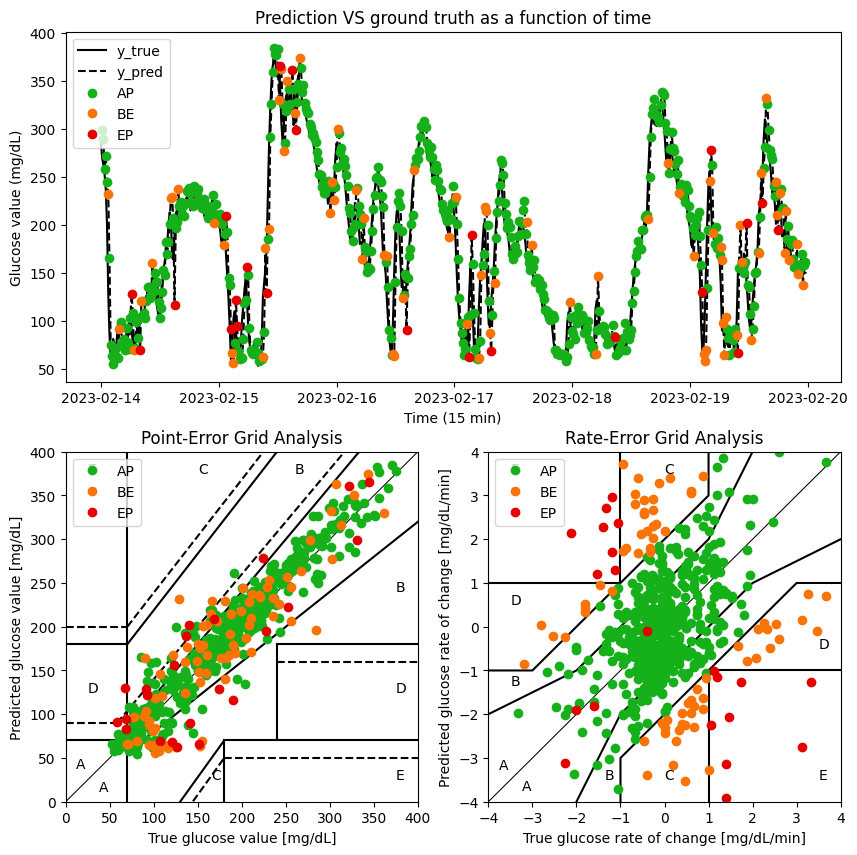

In [71]:
freq = 15
cg_ega = CG_EGA(dfPlot, freq)
print("AP, BE, EP:", cg_ega.reduced())
cg_ega.plot(day=5)